In [1]:
import os
from utilities import *
from SoCS18 import *
from journal_paper import *
% matplotlib inline

In [2]:
# config
alias['interval heuristic'] = 'Polyanya-hv'
alias['target heuristic'] = 'Polyanya-ht'
alias['polyanya'] = 'BF Polyanya'
alias['target heuristic call'] = 'Polyanya-ht hcall'
alias['poly-zero'] = 'Polyanya-h0'
alias['fence nn'] = 'Fence nn'

styles["LVG"] = "ro-"
styles["interval heuristic"] = "g^-"
styles["interval heuristic"] = "g^-"
styles["target heuristic"] = "kx-"
styles["target heuristic call"] = "k*-"
styles["heuristic cost"] = "k^-"
styles["total cost"] = "cD-."
styles["polyanya"] = "bs-"
styles["poly-zero"] = "b+-"
styles["node push"] = "m|-"
styles['fence heuristic'] = 'ys-'
styles['Fence nn'] = 'rs-'
for k in list(styles.keys()):
    if alias.get(k, None) is not None:
        styles[alias[k]] = styles[k]
                    
plt.rcParams.update({'font.size': 20})
plt.rc('grid', linestyle="-.", color='gray')

In [ ]:
# load dense
paths0 = os.listdir('../outputs/s1/')
paths0 = ['../outputs/s1/' + i for i in paths0]
df0 = load_files(paths0)

# load sparse
paths1 = os.listdir('../outputs/s2/')
paths1 = ['../outputs/s2/' + i for i in paths1]
df1 = load_files(paths1)

In [3]:
# time_ylim = [0.0005, 10**6]
# gen_ylim = [5, 10**7]
time_ylim = None
gen_ylim = None

In [4]:
paths = os.listdir('../outputs/nn/')
paths = ['../outputs/nn/' + i for i in paths if i.startswith('brc')]
df3 = load_files(paths)
df3.head()

../outputs/nn/brc202d-20-8.log
../outputs/nn/brc202d-20-9.log
../outputs/nn/brc202d-20-10.log
../outputs/nn/brc202d-20-60.log
../outputs/nn/brc202d-20-70.log
../outputs/nn/brc202d-20-80.log
../outputs/nn/brc202d-20-40.log
../outputs/nn/brc202d-20-100.log
../outputs/nn/brc202d-20-50.log
../outputs/nn/brc202d-20-90.log
../outputs/nn/brc202d-20-7.log
../outputs/nn/brc202d-20-20.log
../outputs/nn/brc202d-20-6.log
../outputs/nn/brc202d-20-4.log
../outputs/nn/brc202d-20-5.log
../outputs/nn/brc202d-20-1.log
../outputs/nn/brc202d-20-2.log
../outputs/nn/brc202d-20-30.log
../outputs/nn/brc202d-20-3.log


,k,dist,cost_edbt,gen_edbt,cost_ki0,gen_ki0,cost_ki,gen_ki,cost_poly,gen_poly,...,hcall,reevaluate,cost_fi,gen_fi,cost_pre,gen_pre,edgecnt,fencecnt,pts,polys
0,1,62.0537,0,0,308.733,313,196.944,227,30.159,33,...,19,0,14.824,24,19076.8,8665,6246,15896,7,75
1,1,58.2495,0,0,707.352,650,346.719,386,9.402,18,...,8,0,52.463,147,19076.8,8665,6246,15896,7,75
2,1,29.3399,0,0,89.871,129,48.532,73,11.042,22,...,11,0,29.991,94,19076.8,8665,6246,15896,7,75
3,1,81.8189,0,0,777.115,779,581.456,603,37.656,53,...,34,0,2.437,9,19076.8,8665,6246,15896,7,75
4,1,154.1170,0,0,723.442,730,485.110,540,123.189,137,...,108,0,59.793,123,19076.8,8665,6246,15896,7,75


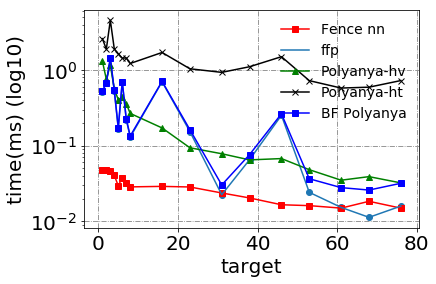

In [5]:
nn_experiment_time(df3, time_ylim)

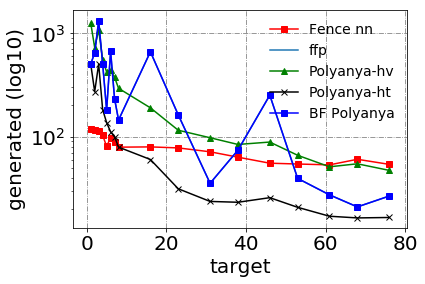

In [6]:
nn_experiment_gen(df3, gen_ylim)

# Experiment 1

* dense:  $|O|=9000, |T|=|O|, k=1$
* sparse: $|O|=9000, |T|=5, k=1$


In [ ]:
experiment1_dense_time(df0, time_ylim)

In [ ]:
experiment1_dense_gen(df0, gen_ylim)

In [ ]:
experiment1_sparse_time(df1, time_ylim)

In [ ]:
# sparse: gen
experiment1_sparse_gen(df1, gen_ylim)

## Experiment 2
* dense: $|O|=9000,|T|=|O|,k \in [1...10]$
* sparse: $|O|=9000,|T|=10,k \in [1...10]$

In [ ]:
experiment2_dense_time(df0, time_ylim)

In [ ]:
experiment2_dense_gen(df0, gen_ylim)

In [ ]:
experiment2_sparse_time(df1, time_ylim)

In [ ]:
experiment2_sparse_gen(df1, gen_ylim)

# Experiment 3
* sparse: $|O|=9000,k=1,|T| \in [1,...10]$

In [ ]:
experiment3_time(df1, time_ylim)

In [ ]:
experiment3_gen(df1, gen_ylim)

## Behavior of target heuristic


In [ ]:
df2 = load_files(["../s2.log"])
df2.head()

In [ ]:
# sparse: time
saveto = None
limit = 1
size =10
df = df2.copy()
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
algos = []

# xs[0], ys[0] = gen_xy(df, 'dist', 'cost_ki0', limit=limit)
# algos.append(alias['poly-zero'])

xs[1], ys[1] = ut.gen_xy(df, 'dist', 'cost_ki', limit=limit)
algos.append(alias['interval heuristic'])

xs[2], ys[2] = ut.gen_xy(df, 'dist', 'cost_hi', limit=limit)
algos.append(alias['target heuristic'])

xs[3], ys[3] = ut.gen_xy(df, 'dist', 'cost_poly', limit=limit)
algos.append(alias['polyanya'])

xs[4], ys[4] = ut.gen_xy(df, 'dist', 'cost_fi', limit=limit)
algos.append("fence heuristic")

for k in xs.keys():
  xs[k] = [v * size for v in xs[k]]
  ys[k] = [v / 1000 for v in ys[k]]

ut.plot_graph('dist', 'time(ms) (log10)', list(xs.values()), list(ys.values()), algos,
         ylim=time_ylim, saveto=saveto)



In [ ]:
# sparse: gen
saveto = None
limit = 1
size = 10
df = df2.copy()
df.dist = (df.dist / size).astype(int)
xs = {}
ys = {}
algos = []

# xs[0], ys[0] = gen_xy(df, 'dist', 'cost_ki0', limit=limit)
# algos.append(alias['poly-zero'])

xs[1], ys[1] = ut.gen_xy(df, 'dist', 'gen_ki', limit=limit)
algos.append(alias['interval heuristic'])

xs[2], ys[2] = ut.gen_xy(df, 'dist', 'gen_hi', limit=limit)
algos.append(alias['target heuristic'])

xs[3], ys[3] = ut.gen_xy(df, 'dist', 'gen_poly', limit=limit)
algos.append(alias['polyanya'])

xs[4], ys[4] = ut.gen_xy(df, 'dist', 'cost_fi', limit=limit)
algos.append("fence heuristic")

for k in xs.keys():
  xs[k] = [v * size for v in xs[k]]

ut.plot_graph('dist', 'generated (log10)', list(xs.values()), list(ys.values()), algos,
         ylim=gen_ylim, saveto=saveto)



In [ ]:
df2['hcall_ratio'] = df2.hcall.astype(float) / df2.hcall2.astype(float)
df2['hcost_ratio'] = df2.hcost.astype(float) / df2.hcost2.astype(float)
df2['cost_ratio'] = df2.cost_hi / df2.cost_hi2
df2['gen_ratio'] = df2.gen_hi / df2.gen_hi2

In [ ]:
df2.hcall_ratio.describe()

In [ ]:
plt.hist(df.hcall_ratio, bins=20)

In [ ]:
df2.hcost_ratio.describe()

In [ ]:
plt.hist(df.hcost_ratio, bins=20)

In [ ]:
df2.cost_ratio.describe()

In [ ]:
plt.hist(df2.cost_ratio, bins=50)

In [ ]:
df2.gen_ratio.describe()

In [ ]:
plt.hist(df2.gen_ratio, bins=50)

In [ ]:
# lazy-compute
df = df2.copy()
df['ratio1'] = df.hcall / df.gen_hi
df['ratio2'] = df.hcall2 / df.gen_hi2

# plt.rc('grid', linestyle="-.", color='gray')
fig, ax = plt.subplots()
ax.set_xlabel('heuristic call / generated')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0.1, 1.0, 0.05), minor=True)
plt.hist(df.ratio1, bins=100, range=(0.1, 2.0), color='b')
plt.hist(df.ratio2, bins=100, range=(0.1, 2.0), color='r')
plt.grid(True)
fig.savefig('./figs/lazy_compute.png', bbox_inches='tight')

In [ ]:
# lazy-compute
df = df2.copy()
df['ratio'] = df.hcall2 / df.gen_hi2

# plt.rc('grid', linestyle="-.", color='gray')
fig, ax = plt.subplots()
ax.set_xlabel('heuristic call / generated')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0.1, 1.0, 0.05), minor=True)
plt.hist(df.ratio, bins=100, range=(0.1, 1.0))
plt.grid(True)
fig.savefig('./figs/lazy_compute.png', bbox_inches='tight')

In [ ]:
plt.hist(df2.ratio, bins=20)

In [ ]:
import matplotlib.ticker

In [ ]:
df1.head()

In [ ]:
# hcall ratio
df = df1.copy()
df['hratio'] = df.hcost / df.cost_hi
fig, ax = plt.subplots()
ax.set_xlabel('heuristic cost / total cost')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0.1, 1.0, 0.05), minor=True)
plt.hist(df.hratio, bins=100, color='orange')
plt.grid(True)
fig.savefig('./figs/hcost.png', bbox_inches='tight')

In [ ]:
df1[df1.k == 1].shape

In [ ]:
# lazy-compute
df = df1.copy()
df = df[(df.k == 1)]
df['ratio'] = df.hcall / df.gen_hi

# plt.rc('grid', linestyle="-.", color='gray')
fig, ax = plt.subplots()
ax.set_xlabel('heuristic call / generated')
ax.set_ylabel('count')
ax.set_xticks(np.arange(0.1, 1.0, 0.05), minor=True)
plt.hist(df.ratio, bins=100, range=(0.1, 1.0))
plt.grid(True)
fig.savefig('./figs/lazy_compute.png', bbox_inches='tight')

In [ ]:
# lazy-reassign
saveto = './figs/lazy_reassign.png'
df = df1.copy()
# df = df[df.k > 1]
df['rate'] = df.reevaluate / df.gen_hi
x, y = gen_xy(df, 'k', 'rate', limit=1)
plot_graph('k', 're-assign rate', [x], [y], 
           ['lazy reassign'], yscale='linear', saveto=saveto)
